In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
csvFilePath = "/content/drive/My Drive/CSE445/CSE445 Dataset/ck_features.csv"
df = pd.read_csv(csvFilePath, header = None)

In [ ]:
csvFilePath = "/content/drive/My Drive/CSE445/CSE445 Dataset/jaffe_features.csv"
df = pd.read_csv(csvFilePath, header = None)

In [ ]:
csvFilePath = "/content/drive/My Drive/CSE445/CSE445 Dataset/kdef_features.csv"
df = pd.read_csv(csvFilePath, header = None)

In [ ]:
df.shape

(839, 273)

In [ ]:
df.head(n = 10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272
0,-84.0,-45.0,95.294281,0.0,-83.0,-22.0,85.866175,0.0,-79.0,1.0,79.006329,0.0,-75.0,24.0,78.746428,0.0,-69.0,47.0,83.486526,0.0,-58.0,68.0,89.375612,0.0,-41.0,84.0,93.471921,0.0,-21.0,94.0,96.317184,0.0,2.0,97.0,97.020616,2.813931,25.0,94.0,97.267672,2.574607,...,65.0,65.375837,0.0,-17.0,59.0,61.400326,0.0,-18.0,44.0,47.539457,0.0,-6.0,35.0,35.510562,0.0,2.0,35.0,35.057096,2.777466,10.0,36.0,37.363083,2.563600,21.0,44.0,48.754487,2.389246,10.0,49.0,50.009999,2.633230,2.0,50.0,50.039984,2.794568,-6.0,49.0,49.365980,0.0,5.0
1,-84.0,-47.0,96.254870,0.0,-82.0,-23.0,85.164547,0.0,-77.0,1.0,77.006493,0.0,-70.0,24.0,74.000000,0.0,-62.0,45.0,76.609399,0.0,-51.0,67.0,84.202138,0.0,-36.0,86.0,93.230896,0.0,-18.0,97.0,98.655968,0.0,2.0,99.0,99.020200,2.799643,22.0,96.0,98.488578,2.594565,...,79.0,79.404030,0.0,-19.0,70.0,72.532751,0.0,-20.0,51.0,54.781384,0.0,-7.0,35.0,35.693137,0.0,1.0,35.0,35.014283,2.791278,8.0,35.0,35.902646,2.595131,21.0,51.0,55.154329,2.429235,8.0,65.0,65.490457,2.697381,0.0,66.0,66.000000,0.000000,-7.0,65.0,65.375837,0.0,5.0
2,-85.0,-45.0,96.176920,0.0,-83.0,-21.0,85.615419,0.0,-79.0,3.0,79.056942,0.0,-74.0,26.0,78.434686,0.0,-67.0,48.0,82.419658,0.0,-55.0,68.0,87.458562,0.0,-38.0,82.0,90.376988,0.0,-18.0,91.0,92.763139,0.0,4.0,92.0,92.086915,2.802701,25.0,89.0,92.444578,2.572310,...,65.0,65.620119,0.0,-20.0,59.0,62.297673,0.0,-24.0,46.0,51.884487,0.0,-8.0,39.0,39.812058,0.0,0.0,39.0,39.000000,0.000000,9.0,39.0,40.024992,2.619353,25.0,45.0,51.478151,2.339053,10.0,52.0,52.952809,2.656164,0.0,53.0,53.000000,0.000000,-8.0,52.0,52.611786,0.0,5.0
3,-84.0,-57.0,101.513546,0.0,-82.0,-32.0,88.022724,0.0,-78.0,-7.0,78.313473,0.0,-73.0,17.0,74.953319,0.0,-65.0,40.0,76.321688,0.0,-52.0,61.0,80.156098,0.0,-35.0,78.0,85.492690,0.0,-17.0,90.0,91.591484,0.0,3.0,92.0,92.048900,2.787245,23.0,89.0,91.923882,2.566948,...,65.0,65.490457,0.0,-19.0,58.0,61.032778,0.0,-24.0,45.0,51.000000,0.0,-8.0,42.0,42.755117,0.0,1.0,44.0,44.011362,2.797119,9.0,42.0,42.953463,2.608749,26.0,44.0,51.107729,2.286134,10.0,52.0,52.952809,2.629854,1.0,54.0,54.009258,2.801326,-8.0,52.0,52.611786,0.0,5.0
4,-84.0,-54.0,99.859902,0.0,-82.0,-31.0,87.664132,0.0,-77.0,-8.0,77.414469,0.0,-72.0,14.0,73.348483,0.0,-64.0,35.0,72.945185,0.0,-51.0,54.0,74.276510,0.0,-35.0,70.0,78.262379,0.0,-17.0,84.0,85.702975,0.0,2.0,88.0,88.022724,2.738363,22.0,83.0,85.866175,2.501984,...,60.0,60.671245,0.0,-21.0,52.0,56.080300,0.0,-27.0,38.0,46.615448,0.0,-9.0,36.0,37.107951,0.0,0.0,37.0,37.000000,0.000000,10.0,36.0,37.363083,2.490139,28.0,37.0,46.400431,2.113275,10.0,47.0,48.052055,2.551446,1.0,49.0,49.010203,2.740681,-9.0,48.0,48.836462,0.0,5.0
5,-90.0,-50.0,102.956301,0.0,-88.0,-25.0,91.482239,0.0,-83.0,0.0,83.000000,0.0,-78.0,24.0,81.608823,0.0,-71.0,47.0,85.146932,0.0,-60.0,68.0,90.686272,0.0,-44.0,86.0,96.602277,0.0,-23.0,95.0,97.744565,0.0,0.0,97.0,97.000000,0.000000,23.0,94.0,96.772930,2.560011,...,74.0,74.431176,0.0,-20.0,66.0,68.963759,0.0,-23.0,47.0,52.325902,0.0,-6.0,36.0,36.496575,0.0,1.0,36.0,36.013886,2.772207,10.0,37.0,38.327536,2.536013,26.0,48.0,54.589376,2.303554,10.0,60.0,60.827625,2.634828,1.0,61.0,61.008196,2.783585,-7.0,60.0,60.406953,0.0,5.0
6,-80.0,-43.0,90.824006,0.0,-78.0,-20.0,80.523289,0.0,-74.0,1.0,74.006756,0.0,-70.0,23.0,73.681748,0.0,-66.0,44.0,79.322128,0.0,-57.0,64.0,85.702975,0.0,-42.0,81.0,91.241438,0.0,-24.0,92.0,95.078915,0.0,-1.0,94.0,94.005319,0.000000,23.0,92.0,94.831429,2.568061,...,61.0,61.814238,0.0,-21.0,55.0,58.872744,0.0,-23.0,44.0,49.648766,0.0,-9.0,36.0,37.107951,0.0,-1.0,37.0,37.013511,0.000000,7.0,37.0,37.656341,2.626060,22.0,45.0,50.089919,2.358320,7.0,49.0,49.497475,2.671142,-1.0,50.0,50.009999,0.000000,-9.0,48.0,48.836462,0.0,5.0
7,-83.0,-43.0,93.477270,0.0,

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272
count,839.000000,839.000000,839.000000,839.0,839.000000,839.000000,839.000000,839.0,839.00000,839.000000,839.000000,839.0,839.000000,839.000000,839.000000,839.0,839.000000,839.000000,839.000000,839.0,839.000000,839.000000,839.000000,839.0,839.000000,839.000000,839.000000,839.0,839.000000,839.000000,839.000000,839.0,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.000000,839.0,839.000000,839.000000,839.000000,839.0,839.000000,839.000000,839.000000,839.0,839.000000,839.000000,839.000000,839.0,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.0,839.000000
mean,-85.052443,-45.493445,96.616189,0.0,-83.445769,-22.629321,86.629769,0.0,-80.06913,-0.197855,80.227626,0.0,-76.268176,21.921335,79.480048,0.0,-69.904648,43.170441,82.247008,0.0,-58.103695,62.010727,85.043848,0.0,-41.584029,76.943981,87.516917,0.0,-21.814064,87.036949,89.764059,0.0,1.073897,89.296782,89.326032,1.700417,23.867700,86.874851,90.130457,2.473490,...,53.743743,54.660969,0.0,-21.864124,48.530393,53.397604,0.0,-27.567342,37.721097,47.185545,0.0,-9.027414,34.903456,36.142756,0.0,0.241955,35.772348,35.796437,1.168682,10.053635,34.867700,36.384591,2.456888,28.567342,37.783075,47.824259,2.093746,10.089392,41.938021,43.198733,2.503156,0.214541,43.022646,43.045150,1.219328,-9.201430,41.889154,42.955122,0.0,2.501788
std,4.229357,6.498367,5.381702,0.0,3.886407,5.674096,4.222561,0.0,3.87637,5.046934,3.885906,0.0,4.034851,4.787963,4.413927,0.0,4.009888,4.732287,4.922735,0.0,3.597927,4.803900,4.992280,0.0,2.973596,5.494884,5.424159,0.0,2.358905,6.657120,6.600882,0.0,2.001616,7.277085,7.272282,1.319924,2.478142,6.693945,6.659560,0.063792,...,7.055178,6.971877,0.0,3.648734,5.693753,5.257893,0.0,5.155106,4.890780,2.608944,0.0,2.017930,4.177331,3.867946,0.0,1.284144,4.178236,4.176027,1.342949,2.028610,4.181776,3.819395,0.117867,5.103925,4.981651,2.703530,0.177817,2.134582,6.270815,6.191597,0.094744,1.353587,6.424202,6.419461,1.351162,2.116804,6.257281,6.152440,0.0,1.709076
min,-97.000000,-66.000000,82.734515,0.0,-95.000000,-39.000000,76.485293,0.0,-94.00000,-14.000000,70.064256,0.0,-90.000000,8.000000,65.764732,0.0,-81.000000,29.000000,65.863495,0.0,-68.000000,48.000000,68.680419,0.0,-51.000000,63.000000,72.013888,0.0,-30.000000,73.000000,75.432089,0.0,-7.000000,74.000000,74.006756,0.000000,15.000000,72.000000,75.286121,2.240955,...,38.000000,39.293765,0.0,-33.000000,34.000000,38.948684,0.0,-45.000000,23.000000,35.383612,0.0,-16.000000,24.000000,25.298221,0.0,-4.000000,24.000000,24.020824,0.000000,4.000000,24.000000,25.632011,2.093200,19.000000,22.000000,35.608988,1.512890,4.000000,28.000000,29.410882,2.243949,-4.000000,29.000000,29.017236,0.000000,-17.000000,28.000000,29.732137,0.0,0.000000
25%,-88.000000,-50.000000,92.590496,0.0,-86.000000,-26.500000,83.743656,0.0,-82.00000,-4.000000,78.000000,0.0,-79.000000,18.000000,76.442777,0.0,-73.000000,40.000000,78.816242,0.0,-61.000000,58.000000,82.024387,0.0,-44.000000,72.000000,83.240615,0.0,-23.000000,80.000000,82.861330,0.0,0.000000,82.000000,82.003049,0.000000,22.000000,80.000000,83.336611,2.429184,...,49.000000,49.819675,0.0,-24.000000,45.000000,49.769469,0.0,-29.000000,35.000000,45.607017,0.0,-10.000000,32.000000,33.526109,0.0,-1.000000,33.000000,33.000000,0.000000,9.000000,32.000000,33.615473,2.369970,25.000000,35.000000,46.141088,1.990803,9.000000,38.000000,38.832976,2.432463,-1.000000,39.000000,39.000000,0.000000,-11.000000,38.000000,38.639358,0.0,1.000000
50%,-85.000000,-45.000000,96.254870,0.0,-83

In [ ]:
features = df.iloc[:, :-1]
corrMatrix = features.corr().abs()

In [ ]:
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
toDrop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [ ]:
newDf = df.drop(columns = to_drop)

In [ ]:
df = newDf

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1:].values.ravel()

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = scaler.fit_transform(X, Y)

In [ ]:
labels = sorted(["angry", "sad", "happy", "neutral", "disgust", "surprise"])

In [ ]:
from sklearn.svm import SVC
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
clf = SVC(C = 1.5, kernel = "rbf", class_weight = "balanced")

In [ ]:
scores = cross_val_score(clf, X, Y, cv=5)
scores

array([0.80952381, 0.79166667, 0.78571429, 0.72619048, 0.83233533])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [ ]:
clf = SVC(C = 1.5, kernel = "rbf", class_weight = "balanced")

In [ ]:
clf.fit(x_train, y_train)

SVC(C=1.5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
cnf = confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred, target_names = labels))

              precision    recall  f1-score   support

       angry       0.61      0.74      0.67        19
     disgust       0.82      0.70      0.75        33
       happy       0.96      0.93      0.94        27
     neutral       0.61      0.63      0.62        30
         sad       0.52      0.56      0.54        27
    surprise       1.00      0.97      0.98        32

    accuracy                           0.76       168
   macro avg       0.75      0.75      0.75       168
weighted avg       0.77      0.76      0.76       168



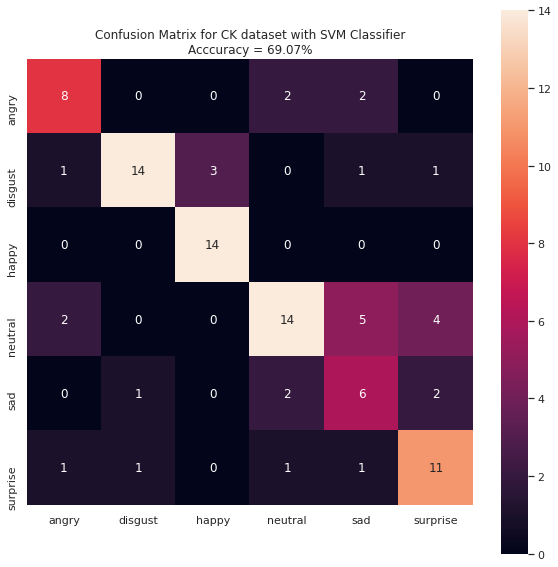

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Confusion Matrix for CK dataset with SVM Classifier\nAcccuracy = {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
sns.set(font_scale = 1)
heatmap = sns.heatmap(cnf, annot = True, fmt = "d", square = True, xticklabels = labels, yticklabels = labels, ax = ax)

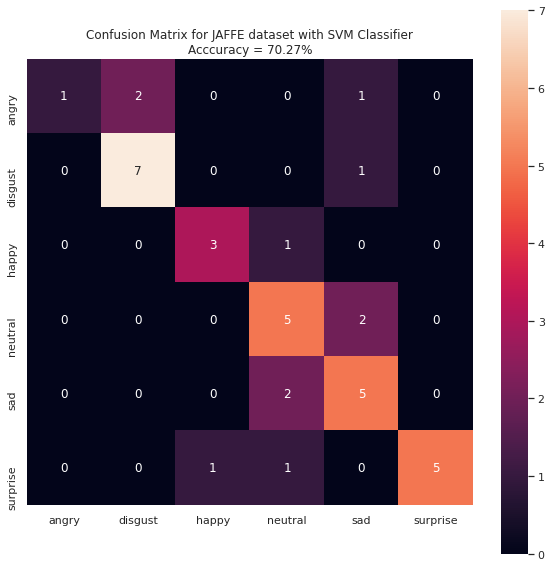

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Confusion Matrix for JAFFE dataset with SVM Classifier\nAcccuracy = {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
sns.set(font_scale = 1)
heatmap = sns.heatmap(cnf, annot = True, fmt = "d", square = True, xticklabels = labels, yticklabels = labels, ax = ax)

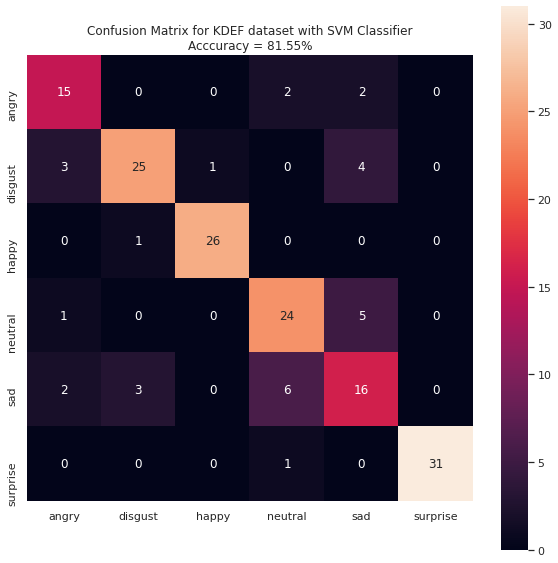

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Confusion Matrix for KDEF dataset with SVM Classifier\nAcccuracy = {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
sns.set(font_scale = 1)
heatmap = sns.heatmap(cnf, annot = True, fmt = "d", square = True, xticklabels = labels, yticklabels = labels, ax = ax)

In [ ]:
clf = SVC(C = 1.5, kernel = "poly", class_weight = "balanced")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cnf = confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred, target_names = labels))

              precision    recall  f1-score   support

       angry       0.75      0.79      0.77        19
     disgust       0.85      0.85      0.85        33
       happy       1.00      0.93      0.96        27
     neutral       0.82      0.93      0.87        30
         sad       0.82      0.67      0.73        27
    surprise       0.94      1.00      0.97        32

    accuracy                           0.87       168
   macro avg       0.86      0.86      0.86       168
weighted avg       0.87      0.87      0.87       168



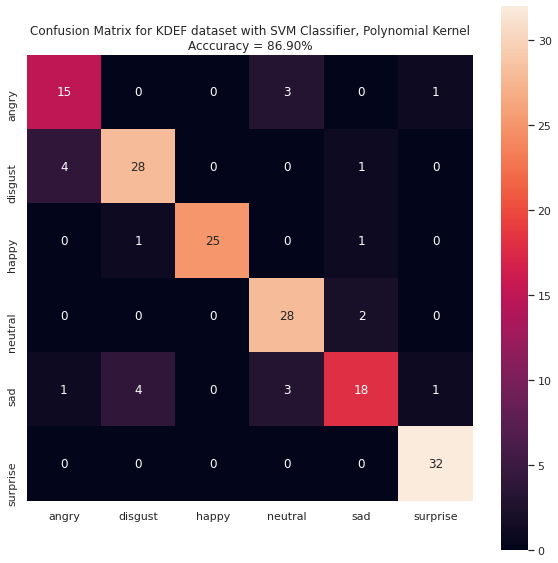

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Confusion Matrix for KDEF dataset with SVM Classifier, Polynomial Kernel\nAcccuracy = {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
sns.set(font_scale = 1)
heatmap = sns.heatmap(cnf, annot = True, fmt = "d", square = True, xticklabels = labels, yticklabels = labels, ax = ax)

Dropping highly correlated features lowered the classification accuracy

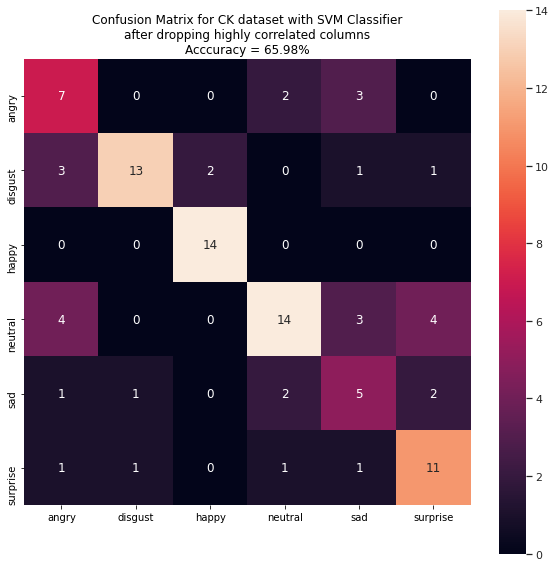

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Confusion Matrix for CK dataset with SVM Classifier\nafter dropping highly correlated columns\nAcccuracy = {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
sns.set(font_scale = 1)
heatmap = sns.heatmap(cnf, annot = True, fmt = "d", square = True, xticklabels = labels, yticklabels = labels, ax = ax)

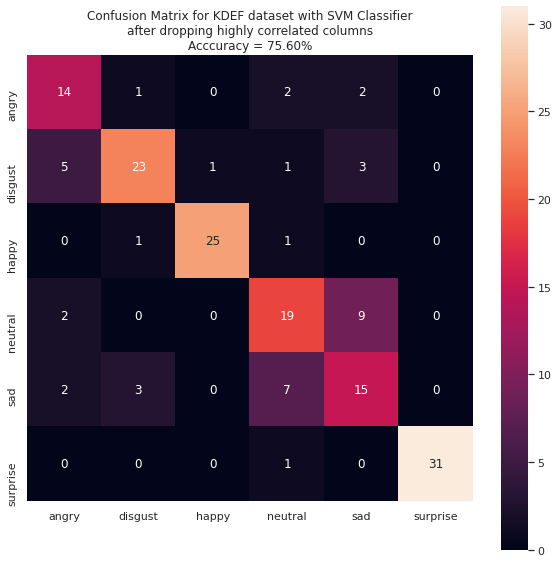

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Confusion Matrix for KDEF dataset with SVM Classifier\nafter dropping highly correlated columns\nAcccuracy = {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
sns.set(font_scale = 1)
heatmap = sns.heatmap(cnf, annot = True, fmt = "d", square = True, xticklabels = labels, yticklabels = labels, ax = ax)